In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, auc
import sklearn 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import forestci as fci

Failed to import duecredit due to No module named 'duecredit'


In [2]:
#Load in the data set
fifaDB = pd.read_csv("data.csv")

In [3]:
#Preview Data base
fifaDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [4]:
fifaDB.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [5]:
#Drop unnecessary columns
Fifa = fifaDB.drop(['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Unnamed: 0', 'Photo', 'Flag', 'Club Logo', 'Joined', 'Loaned From', 'Contract Valid Until', 'Special', 'International Reputation', 'Real Face', "Nationality", "Age", "ID", "Release Clause", "Club","GKDiving", "GKHandling", "GKKicking", "GKPositioning", "GKReflexes"], axis=1)

In [6]:
#Look for null values
Fifa.isna().sum() 

Name                0
Overall             0
Potential           0
Value               0
Wage                0
Preferred Foot     48
Weak Foot          48
Skill Moves        48
Work Rate          48
Body Type          48
Position           60
Jersey Number      60
Height             48
Weight             48
Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
dtype: int64

In [7]:
#Drop null values
Fifa = Fifa.dropna()

In [8]:
# Set index
Fifa.set_index('Name', inplace=True)

In [9]:
list_wages = Fifa['Wage']
wages = []
for i in list_wages:
    hoi = i.strip('K').strip('€')
    wage = int(hoi) * 1000
    wages.append(wage)
    
Fifa['Wage'] = wages



In [10]:
list_lengths = np.array(Fifa['Height'])
empty_list = []
for x in list_lengths:
    splitted_values = str(x).split("'")
    feet = (float(x[0])) + (float(x[2])/10)
    centimeters = feet * 30.48
    empty_list.append(round(centimeters))

Fifa['Height'] = empty_list


In [11]:
list_value = Fifa['Value']
list_new_values = []
rows = list_value[:]

for v in rows:
    if v[-1] == 'M':
        strip_value = v.strip('M€')
        if len(strip_value) >= 4:
            yes = (strip_value[:3])
            new_value = float(yes) * 1000000
            list_new_values.append(int(new_value))
        else:
            new_value = float(strip_value) * 1000000
            list_new_values.append(int(new_value))
            
    else:
        strip_value = v.strip('K€')
        new_value = float(strip_value) * 1000
        
        list_new_values.append(int(new_value))

        
Fifa['Value'] = list_new_values

In [12]:
list_weight = Fifa['Weight']
weights = []
for i in list_weight:
    lbs_to_kg = i.strip('lbs')
    convert_weight = float(lbs_to_kg)/2.2046
    roundup_weight = round(convert_weight)
    weights.append(roundup_weight)

Fifa['Weight'] = weights

In [13]:
#onehot encoding
Fifa["Preferred Foot"] = pd.get_dummies(Fifa["Preferred Foot"])

In [14]:
#Rename positions
for i in ['ST', 'CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW']:
  Fifa.loc[Fifa.Position == i , 'Position'] = 'Strikers' 

for i in ['CAM', 'CDM', 'LCM', 'CM', 'LAM', 'LDM', 'LM', 'RAM', 'RCM', 'RDM', 'RM']:
  Fifa.loc[Fifa.Position == i , 'Position'] = 'Midfielder' 

for i in ['CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB']:
  Fifa.loc[Fifa.Position == i , 'Position'] = 'Defender' 

In [15]:
#Remove Goalkeepers
Fifa = Fifa.loc[Fifa['Position'] != 'GK', :]

In [16]:
#Checking Dataframe
Fifa

,Overall,Potential,Value,Wage,Preferred Foot,Weak Foot,Skill Moves,Work Rate,Body Type,Position,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
Name,,,,,,,,,,,,,,,,,,,,,
L. Messi,94,94,110000000,565000,1,4.0,4.0,Medium/ Medium,Messi,Strikers,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
Cristiano Ronaldo,94,94,77000000,405000,0,4.0,5.0,High/ Low,C. Ronaldo,Strikers,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
Neymar Jr,92,93,118000000,290000,0,5.0,5.0,High/ Medium,Neymar,Strikers,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
K. De Bruyne,91,92,102000000,355000,0,5.0,4.0,High/ High,Normal,Midfielder,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
E. Hazard,91,91,93000000,340000,0,4.0,4.0,High/ Medium,Normal,Strikers,...,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
J. Lundstram,47,65,60000,1000,0,2.0,2.0,Medium/ Medium,Lean,Midfielder,...,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0
N. Christoffersson,47,63,60000,1000,0,2.0,2.0,Medium/ Medium,Normal,Strikers,...,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0
B. Worman,47,67,60000,1000,0,3.0,2.0,Medium/ Medium,Normal,Strikers,...,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0


In [17]:
#Label encoder for Work Rate and Position
le = preprocessing.LabelEncoder()
Fifa['Work Rate'] = Fifa[['Work Rate']].apply(le.fit_transform)
Fifa['Body Type'] = Fifa[['Body Type']].apply(le.fit_transform)
Fifa['Position'] = Fifa[['Position']].apply(le.fit_transform)

In [18]:
#Checking Dataframe
Fifa.head(5)

,Overall,Potential,Value,Wage,Preferred Foot,Weak Foot,Skill Moves,Work Rate,Body Type,Position,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
Name,,,,,,,,,,,,,,,,,,,,,
L. Messi,94,94,110000000,565000,1,4.0,4.0,8,3,2,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
Cristiano Ronaldo,94,94,77000000,405000,0,4.0,5.0,1,1,2,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
Neymar Jr,92,93,118000000,290000,0,5.0,5.0,2,4,2,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
K. De Bruyne,91,92,102000000,355000,0,5.0,4.0,0,5,1,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
E. Hazard,91,91,93000000,340000,0,4.0,4.0,2,5,2,...,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0


In [19]:
FifaSkills = Fifa[['Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']]

In [20]:
FifaNormSkill = FifaSkills.div(Fifa.Overall, axis=0)
Fifa['Finishing'] = FifaNormSkill['Finishing']
Fifa['HeadingAccuracy'] = FifaNormSkill['HeadingAccuracy']
Fifa['ShortPassing'] = FifaNormSkill['ShortPassing']
Fifa['Volleys'] = FifaNormSkill['Volleys']
Fifa['Dribbling'] = FifaNormSkill['Dribbling']
Fifa['Curve'] = FifaNormSkill['Curve']
Fifa['FKAccuracy'] = FifaNormSkill['FKAccuracy']
Fifa['LongPassing'] = FifaNormSkill['LongPassing']
Fifa['BallControl'] = FifaNormSkill['BallControl']
Fifa['Acceleration'] = FifaNormSkill['Acceleration']
Fifa['SprintSpeed'] = FifaNormSkill['SprintSpeed']
Fifa['Agility'] = FifaNormSkill['Agility']
Fifa['Reactions'] = FifaNormSkill['Reactions']
Fifa['Balance'] = FifaNormSkill['Balance']
Fifa['ShotPower'] = FifaNormSkill['ShotPower']
Fifa['Jumping'] = FifaNormSkill['Jumping']
Fifa['Stamina'] = FifaNormSkill['Stamina']
Fifa['Strength'] = FifaNormSkill['Strength']
Fifa['LongShots'] = FifaNormSkill['LongShots']
Fifa['Aggression'] = FifaNormSkill['Aggression']
Fifa['Interceptions'] = FifaNormSkill['Interceptions']
Fifa['Positioning'] = FifaNormSkill['Positioning']
Fifa['Vision'] = FifaNormSkill['Vision']
Fifa['Composure'] = FifaNormSkill['Composure']
Fifa['Marking'] = FifaNormSkill['Marking']
Fifa['StandingTackle'] = FifaNormSkill['StandingTackle']
Fifa['SlidingTackle'] = FifaNormSkill['SlidingTackle']

In [21]:
# sns.boxplot(x = "Position", y = "Strength", data = Fifa).set_title("Boxplot of Strength per position")
# sns.boxplot(x = "Position", y = "SlidingTackle", data = Fifa).set_title("Boxplot of SlidingTackle per position")
# sns.boxplot(x = "Position", y = "Finishing", data = Fifa).set_title("Boxplot of Finishing per position")
# sns.boxplot(x = "Position", y = "Vision", data = Fifa).set_title("Boxplot of Vision per position")

In [22]:
#Position counts
positions = Fifa['Position']
print(positions.value_counts())

1    6838
0    5866
2    3418
Name: Position, dtype: int64


In [23]:
#Random Forest
#Features and labels seperation
Features = Fifa.drop(["Position"],axis=1)
Labels = Fifa["Position"]

In [24]:
X = Features
y = Labels

In [25]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [26]:
# #Count plot in test set
# testdf = pd.DataFrame(y_train)
# sns.set(style="darkgrid")
# ax = sns.countplot(x="Position", hue="Position", data=testdf)

In [27]:
# #Random Forest
# #Choose model with hyperparameters
# modelrf = RandomForestClassifier(n_estimators=500, max_features=10,max_depth=10)

In [28]:
# #Selecting best hyperparameters
# param_grid = {
#     'n_estimators': [50, 100],
#     'max_depth': [3, 5, 10],
#     'min_samples_split': [2, 4],
#     'max_features': ['sqrt', 'log2'],
#     'min_samples_leaf': [1, 2, 4],
#     'min_samples_split': [2, 5, 10]
# }

# grid = GridSearchCV(modelrf, param_grid = param_grid, cv = 5, verbose = 5, n_jobs = -1)
# grid.fit(X_train, y_train)

# best_estimator = grid.best_estimator_

In [29]:
# best_estimator

In [30]:
# #fit model
# modelrf.fit(X_train, y_train)

In [31]:
# rfval_predict = best_estimator.predict(X_train)

In [32]:
# #Accuracy
# print('Accuracy:', metrics.accuracy_score(y_train, rfval_predict))

In [33]:
# #Final Prediction
# rf_pred = best_estimator.predict(X_test)
# rf_predprob = best_estimator.predict_proba(X_test)
# #Final Accuracy
# print('Accuracy:', metrics.accuracy_score(y_test, rf_pred))
# print(rf_predprob)

In [34]:
# # Changing ytest
# y_testdf = pd.DataFrame(y_test)

# y_testinv=le.inverse_transform(y_test)
# rf_pred=le.inverse_transform(rf_pred)

In [35]:
# #Confusion matrix
# #k=100
# labels = ['Defender', 'Midfielder', 'Strikers']
# con_matrf = metrics.confusion_matrix(y_testinv,rf_pred, labels)
# print(con_matrf)
# fig = plt.figure()
# ax = fig.add_subplot(111)
# cax = ax.matshow(con_matrf)
# fig.colorbar(cax)
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

In [36]:
# #Error
# idx_defender = np.where(y_testdf == 0)[0]
# idx_midfielder = np.where(y_testdf == 1)[0]
# idx_attacker = np.where(y_testdf == 2)[0]

# #Creating dataframes
# defender = pd.DataFrame(idx_defender)
# midfielder = pd.DataFrame(idx_midfielder)
# attacker = pd.DataFrame(idx_attacker)

# # Histogram predictions without error bars:
# fig, ax = plt.subplots(1)
# ax.hist(rf_predprob[defender, 1], histtype='step', label='defender')
# ax.hist(rf_predprob[midfielder, 1], histtype='step', label='midfielder')
# ax.hist(rf_predprob[attacker, 1], histtype='step', label='attacker')
# ax.set_xlabel('Position probability')
# ax.set_ylabel('Number of observations')
# plt.legend()

In [37]:
# # # Calculate the variance
# rf_V_IJ_unbiased = fci.random_forest_error(best_estimator, X_train, X_test)

# # Plot forest prediction for emails and standard deviation for estimates
# # Blue points are spam emails; Green points are non-spam emails
# fig, ax = plt.subplots(1)
# ax.scatter(rf_predprob[defender, 1],
#            np.sqrt(rf_V_IJ_unbiased[defender]),
#            label='Defender')

# ax.scatter(rf_predprob[midfielder, 1],
#            np.sqrt(rf_V_IJ_unbiased[midfielder]),
#            label='Midfielder')

# ax.scatter(rf_predprob[attacker, 1],
#            np.sqrt(rf_V_IJ_unbiased[attacker]),
#            label='Striker')

# ax.set_xlabel('Position Probability')
# ax.set_ylabel('Standard deviation')
# plt.legend()
# plt.show()

In [38]:
#K-NEAREST NEIGHBOURS
#Creating model
#Calulating N with root
modelknn100 = KNeighborsClassifier(n_neighbors=100)
#Calculating best N
modelknn2 = KNeighborsClassifier(n_neighbors = 2)
modelknn5 = KNeighborsClassifier(n_neighbors = 5)
modelknn7 = KNeighborsClassifier(n_neighbors = 7)
modelknn20 = KNeighborsClassifier(n_neighbors = 20)
modelknn50 = KNeighborsClassifier(n_neighbors = 50)
modelknn75 = KNeighborsClassifier(n_neighbors = 75)

In [39]:
#Fit and test model on training/validation set
modelknn100.fit(X_train, y_train)
modelknn2.fit(X_train, y_train)
modelknn5.fit(X_train, y_train)
modelknn7.fit(X_train, y_train)
modelknn20.fit(X_train, y_train)
modelknn50.fit(X_train, y_train)
modelknn75.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=75, p=2,
                     weights='uniform')

In [40]:
scores2 = cross_val_score(modelknn2, X_val, y_val, cv=5, scoring='accuracy')
scores5 = cross_val_score(modelknn5, X_val, y_val, cv=5, scoring='accuracy')
scores7 = cross_val_score(modelknn7, X_val, y_val, cv=5, scoring='accuracy')
scores20 = cross_val_score(modelknn20, X_val, y_val, cv=5, scoring='accuracy')
scores50 = cross_val_score(modelknn50, X_val, y_val, cv=5, scoring='accuracy')
scores75 = cross_val_score(modelknn75, X_val, y_val, cv=5, scoring='accuracy')
print('Accuracy K=2:', round(scores2.mean(),3))
print('Accuracy K=5:', round(scores5.mean(),3))
print('Accuracy K=9:', round(scores7.mean(),3))
print('Accuracy K=20:', round(scores20.mean(),3))
print('Accuracy K=50:', round(scores50.mean(),3))
print('Accuracy K=75:', round(scores75.mean(),3))

Accuracy K=2: 0.437
Accuracy K=5: 0.43
Accuracy K=9: 0.439
Accuracy K=20: 0.44
Accuracy K=50: 0.436
Accuracy K=75: 0.424


In [41]:
#Finding best N with Cross validation
scores100 = cross_val_score(modelknn100, X_val, y_val, cv=5, scoring='accuracy')
print('Accuracy K=100:', round(scores100.mean(),3))

Accuracy K=100: 0.424


In [51]:
#Final Prediction train N=100
knn_pred100 = modelknn100.predict(X_train)
#Final Prediction N=20
knn_pred20 = modelknn20.predict(X_train)
#Final Accuracy
print('Train Accuracy K=100:', metrics.accuracy_score(y_train, knn_pred100))
print('Train Accuracy K=20:', metrics.accuracy_score(y_train, knn_pred20))

#Final Prediction N=100
knn_pred100 = modelknn100.predict(X_test)
#Final Prediction N=20
knn_pred20 = modelknn20.predict(X_test)
#Final Accuracy
print('Test Accuracy K=100:', metrics.accuracy_score(y_test, knn_pred100))
print('Test Accuracy K=20:', metrics.accuracy_score(y_test, knn_pred20))

Train Accuracy K=100: 0.48696326451487837
Train Accuracy K=20: 0.5592711059416497
Test Accuracy K=100: 0.467906976744186
Test Accuracy K=20: 0.48093023255813955


In [44]:
y_testinv=le.inverse_transform(y_test)
knn_pred100=le.inverse_transform(knn_pred100)
knn_pred20=le.inverse_transform(knn_pred20)

[[ 503  657    0]
 [ 330 1005    0]
 [ 187  542    1]]


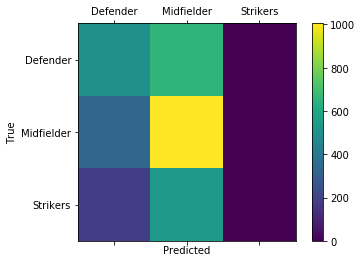

In [45]:
#Confusion matrix
#k=100
labels = ['Defender', 'Midfielder', 'Strikers']
con_mat100 = metrics.confusion_matrix(y_testinv,knn_pred100, labels)
print(con_mat100)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(con_mat100)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [46]:
#Calculating precision & recall
#Sensitivity
print('Recall score n=100:', recall_score(y_testinv,knn_pred100, average='micro'))
print('Precision score n=100:', precision_score(y_testinv,knn_pred100, average='micro'))


Recall score n=100: 0.467906976744186
Precision score n=100: 0.467906976744186


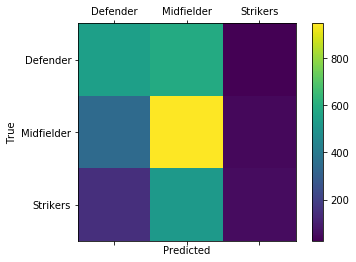

In [47]:
#Confusion matrix
#k=5
labels = ['Defender', 'Midfielder', 'Strikers']
con_mat20 = metrics.confusion_matrix(y_testinv,knn_pred20, labels)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(con_mat20)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [49]:
#Calculating precision & recall
#Sensitivity
print('Recall score n=20:', recall_score(y_testinv,knn_pred20, average='micro'))
print('Precision score n=20:', precision_score(y_testinv,knn_pred20, average='micro'))


Recall score n=20: 0.48093023255813955
Precision score n=20: 0.48093023255813955


In [ ]:
#Logistic Regression CV
modellogcv = LogisticRegressionCV(cv=6, random_state=0, multi_class='ovr')

In [ ]:
#Fit and test model on training/validation set
modellogcv.fit(X_train, y_train)
logcvval_predict = modellogcv.predict(X_val)

In [ ]:
#Validation set accuracy
print("Accuracy:",metrics.accuracy_score(y_val, logcvval_predict))

In [ ]:
#Final Prediction
logcvval_predict = modellogcv.predict(X_test)
#Final Accuracy
print('Accuracy:', metrics.accuracy_score(y_test, logcvval_predict))